In [1]:
%matplotlib inline
import scipy.io
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib import cm
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# import ocean carbon states data
data = scipy.io.loadmat('../Data/OCS_data.mat')

# observation variables
obs_pco2 = data['OBS_PCO2_SW']
obs_sst = data['OBS_SST']
obs_nitr = data['OBS_NITR']
obs_flux = data['OBS_FLUX']
obs_sal = data['OBS_SAL']
obs_wspd = data['OBS_WSPD']

# model variables
mod_pco2 = data['MOD_PCO2_SW']
mod_sst = data['MOD_SST']
mod_nitr = data['MOD_NITR']
mod_flux = data['MOD_FLUX']
mod_sal = data['MOD_SAL']
mod_wspd = data['MOD_WSPD']

In [3]:
obs_pco2.shape

(45, 72, 12)

#### About the dimension of 45 x 72 x 12 variables:
* World map dimension is in 180 x 360, but divided into 4 x 5 grid, we obtain image size of 45 x 72.
* 12 channels indicating monthly average.

# North Atlantic

In [4]:
# observation variables
obs_pco2 = obs_pco2[23:45,20:43,:]
obs_sst = obs_sst[23:45,20:43,:]
obs_nitr = obs_nitr[23:45,20:43,:]
obs_flux = obs_flux[23:45,20:43,:]
obs_sal = obs_sal[23:45,20:43,:]
obs_wspd = obs_wspd[23:45,20:43,:]

# model variables
mod_pco2 = mod_pco2[23:45,20:43,:]
mod_sst = mod_sst[23:45,20:43,:]
mod_nitr = mod_nitr[23:45,20:43,:]
mod_flux = mod_flux[23:45,20:43,:]
mod_sal = mod_sal[23:45,20:43,:]
mod_wspd = mod_wspd[23:45,20:43,:]

In [5]:
obs_pco2.shape

(22, 23, 12)

# 2-D Histograms for Classification Input
* selecting data range and interval based on pdd above

In [6]:
#Make the 12 2D histograms

# observation
obs_pco2_reshaped = obs_pco2.reshape(22*23,12)
obs_sst_reshaped = obs_sst.reshape(22*23,12)
obs_nitr_reshaped = obs_nitr.reshape(22*23,12)
obs_flux_reshaped = obs_flux.reshape(22*23,12)
obs_sal_reshaped = obs_sal.reshape(22*23,12)
obs_wspd_reshaped = obs_wspd.reshape(22*23,12)

# model
mod_pco2_reshaped = mod_pco2.reshape(22*23,12)
mod_sst_reshaped = mod_sst.reshape(22*23,12)
mod_nitr_reshaped = mod_nitr.reshape(22*23,12)
mod_flux_reshaped = mod_flux.reshape(22*23,12)
mod_sal_reshaped = mod_sal.reshape(22*23,12)
mod_wspd_reshaped = mod_wspd.reshape(22*23,12)

In [7]:
# Constrain to North Atlantic region
arr1 = [50,200,300,350,400] #pCO2
arr2 = [-2,10,20,25,30]     #SST

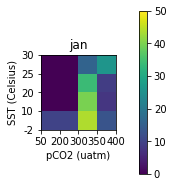

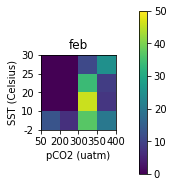

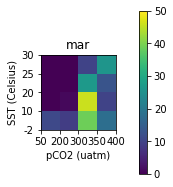

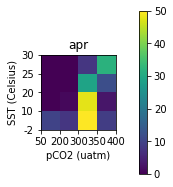

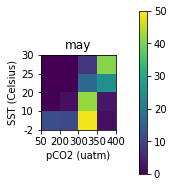

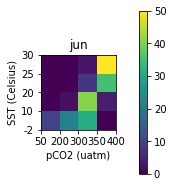

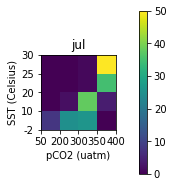

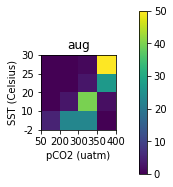

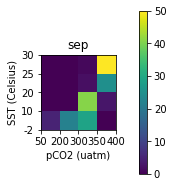

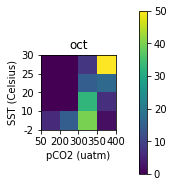

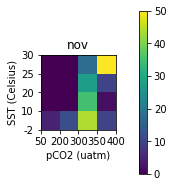

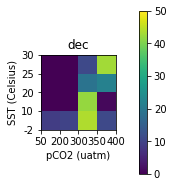

In [8]:
hist2d = np.array([])
mos = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

for i in range(0,12):
    
    # append monthly histograms
    X = obs_pco2_reshaped[:,i]
    Y = obs_sst_reshaped[:,i]
    X1 = np.nan_to_num(X)
    Y1 = np.nan_to_num(Y)
    H, xedges, yedges = np.histogram2d(Y1,X1,bins=(arr2, arr1))
    hist2d = np.append(hist2d,H[::-1])
    
    # plot from the list
    plt.close('all')
    fig = plt.figure(figsize=(7, 3))
    ax = fig.add_subplot(131)
    ax.set_title(mos[i])
    plt.imshow(H[::-1])
    cax = ax.imshow(H[::-1], interpolation='nearest')
    
    cbar = fig.colorbar(cax,orientation="vertical", pad=0.2)
    cax.set_clim(vmin=0, vmax=50)
    plt.xlabel('pCO2 (uatm)')
    plt.ylabel('SST (Celsius)')
    x = [-0.5,0.5,1.5,2.5,3.5]
    y = [3.5,2.5,1.5,0.5,-0.5]
    plt.xticks(x, arr1, rotation='horizontal')
    plt.yticks(y, arr2, rotation='horizontal')
    plt.show()


# 1. K-Means Clustering

In [9]:
hist4Cluster = hist2d.reshape(12,4*4)
kmeans = KMeans(n_clusters=3,random_state=0).fit(hist4Cluster)
y_kmeans = kmeans.predict(hist4Cluster)

print('kmeans: ', y_kmeans)

kmeans:  [2 2 2 2 1 0 0 0 0 0 1 1]


Based on k-means classification result above:
* 0: Summer
* 1: Transition
* 2: Winter

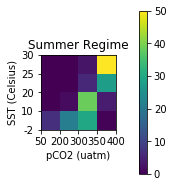

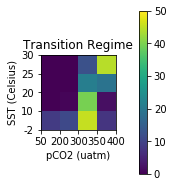

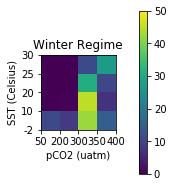

In [10]:
regimes = ['Summer', 'Transition', 'Winter']

for i in range(len(regimes)):
    plt.close('all')
    fig = plt.figure(figsize=(7, 3))
    ax = fig.add_subplot(131)
    ax.set_title(regimes[i] + ' Regime')
    center = kmeans.cluster_centers_[i,:].reshape(4, 4)
    plt.imshow(center)
    cax = ax.imshow(center, interpolation='nearest')
    cbar = fig.colorbar(cax, orientation='vertical', pad=0.2)
    cax.set_clim(vmin=0, vmax=50)
    plt.xlabel('pCO2 (uatm)')
    plt.ylabel('SST (Celsius)')
    x = [-0.5,0.5,1.5,2.5,3.5]
    y = [3.5,2.5,1.5,0.5,-0.5]
    plt.xticks(x, arr1, rotation='horizontal')
    plt.yticks(y, arr2, rotation='horizontal')
    plt.show()
    

# 2. Agglomerative/Hierarchical Clustering

In [11]:
ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(hist4Cluster)
avg = AgglomerativeClustering(n_clusters=3, linkage='average').fit(hist4Cluster)
complete = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(hist4Cluster)

print('agglomerative clustering with ward linkage: ', ward.labels_)
print('agglomerative clustering with average linkage: ', avg.labels_)
print('agglomerative clustering with complete linkage: ', complete.labels_)

agglomerative clustering with ward linkage:  [2 2 2 2 1 0 0 0 0 0 1 1]
agglomerative clustering with average linkage:  [1 1 1 1 1 0 0 0 0 2 1 1]
agglomerative clustering with complete linkage:  [2 2 2 2 1 0 0 0 0 0 1 1]


Ward and Complete seem to have the same exact patterns, which aligns well with k-means result:
* 0: Summer
* 1: Transition
* 2: Winter

Average linkage has quite different pattern:
* 0: Summer
* 1: Winter
* 2: Transition

# 3. Expextation-Maximization (EM) Clustering
* A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means:

In [12]:
from sklearn.mixture import GaussianMixture as gmm

em_full = gmm(n_components=3, covariance_type='full', random_state=0).fit(hist4Cluster)
em_tied = gmm(n_components=3, covariance_type='tied', random_state=0).fit(hist4Cluster)
em_diag = gmm(n_components=3, covariance_type='diag', random_state=0).fit(hist4Cluster)
em_sphr = gmm(n_components=3, covariance_type='spherical', random_state=0).fit(hist4Cluster)

print('EM with full covariance:', gmm.predict(em_full, hist4Cluster))
print('EM with tied covariance:', gmm.predict(em_tied, hist4Cluster))
print('EM with diagonal covariance:', gmm.predict(em_diag, hist4Cluster))
print('EM with spherical covariance:', gmm.predict(em_sphr, hist4Cluster))

EM with full covariance: [2 2 2 2 1 0 0 0 0 0 1 1]
EM with tied covariance: [2 2 2 2 1 0 0 0 0 0 1 1]
EM with diagonal covariance: [2 2 2 2 1 0 0 0 0 0 1 1]
EM with spherical covariance: [2 2 2 2 1 0 0 0 0 0 1 1]


# Shilouette Scores for selecting k in K-Means

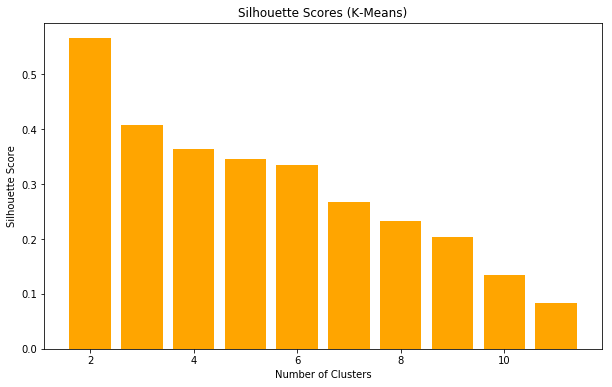

In [13]:
k_scores = list()
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=0)
    k_scores.append(silhouette_score(hist4Cluster, kmeans.fit_predict(hist4Cluster)))

plt.figure(figsize=(10, 6))
plt.bar(list(range(2, 12)), k_scores, color = 'orange')
plt.title('Silhouette Scores (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()